# 2. Scikit Learn Examples - Surrogate Global Models

For our experiments we will use again "Breast Cancer" datase

In [13]:
from sklearn import datasets,model_selection
breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
y = breastCancer.target
target_names = breastCancer.target_names
feature_names = breastCancer.feature_names
#Exactly, the same data for train and test set!
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=0)

In [14]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Random Forests Performance:")
print(classification_report(y_test,y_pred,target_names=target_names))

Random Forests Performance:
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



We have got better results in almost every metric! 97%! But it itsn't explainable! Let's try to create some explanators

In [15]:
new_x_train = x_train
new_y_train = classifier.predict(x_train)

We are ready to create our first global transparent decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive
from graphviz import Source
from sklearn.metrics import accuracy_score

print("Decision Tree Explanator")
def plot_tree(depth=1):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = 'gini'
          , max_depth = depth)
    estimator.fit(new_x_train, new_y_train)
    graph = Source(export_graphviz(estimator
          , out_file=None
          , feature_names=feature_names
          , class_names=target_names
          , filled = True))
    print("Fidelity",accuracy_score(estimator.predict(x_test),y_pred))
    print(classification_report(estimator.predict(x_test),y_pred,target_names=target_names))
    print("Accuracy in new data")
    print(classification_report(estimator.predict(x_test),y_test,target_names=target_names))
    #We could calculate R-square metric too!
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , depth=(1,5))
display(inter)

Decision Tree Explanator


interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

Let's try now a linear model on the new dataset

In [22]:
from sklearn.linear_model import LogisticRegression

lin_model = LogisticRegression(solver="newton-cg",penalty='l2',max_iter=1000,C=100,random_state=0)
#lin_model = LogisticRegression(penalty='l1',max_iter=1000,C=100,random_state=0)
lin_model.fit(new_x_train, new_y_train)
print("Simple Linear Model Performance:")
print("Fidelity",accuracy_score(lin_model.predict(x_test),y_pred))
print(classification_report(lin_model.predict(x_test),y_pred,target_names=target_names))
print("Accuracy in new data")
print(classification_report(lin_model.predict(x_test),y_test,target_names=target_names))
    

Simple Linear Model Performance:
Fidelity 0.9415204678362573
              precision    recall  f1-score   support

   malignant       0.95      0.90      0.92        68
      benign       0.93      0.97      0.95       103

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy in new data
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        68
      benign       0.95      1.00      0.98       103

   micro avg       0.97      0.97      0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Visualizing the explanations

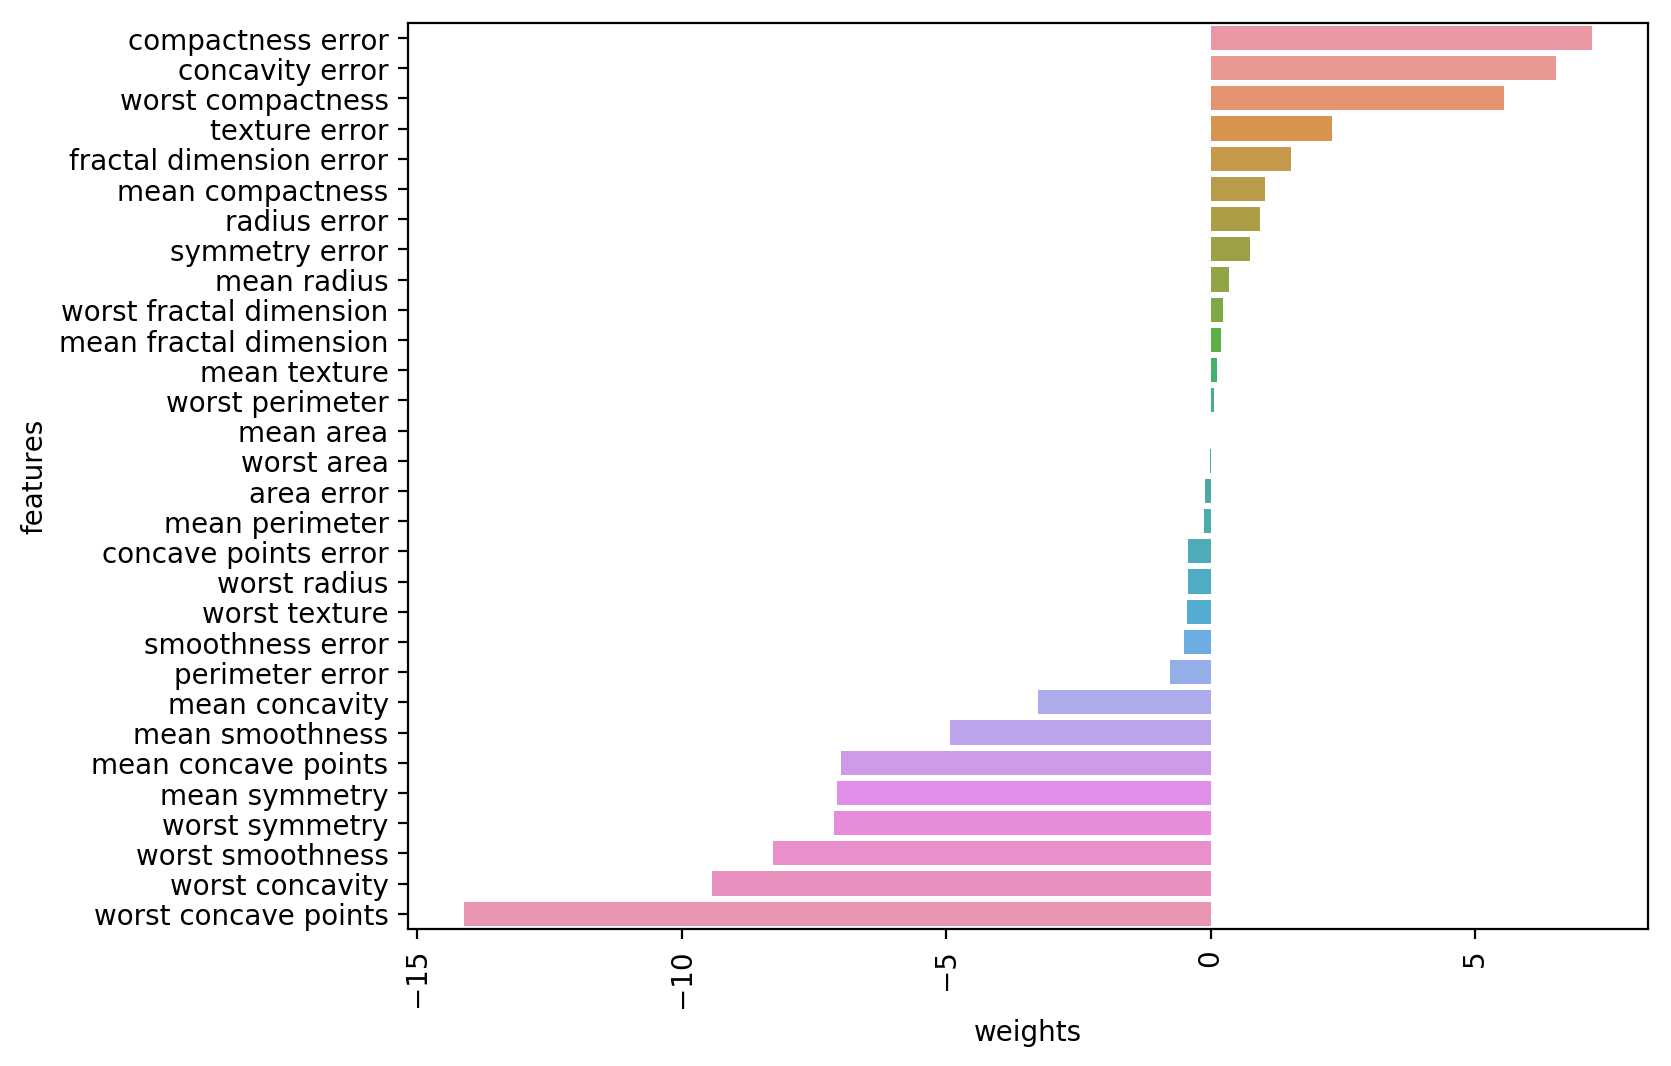

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
weights = lin_model.coef_
model_weights = pd.DataFrame({ 'features': list(feature_names),'weights': list(weights[0])})
model_weights = model_weights.sort_values(by='weights', ascending=False)
plt.figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.xticks(rotation=90)
plt.show()